<a href="https://www.kaggle.com/code/oakthyago/reading-the-files?scriptVersionId=108367576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [2]:
#Transform all the separeted excels in a csv file 

from datetime import datetime
from dateutil.relativedelta import relativedelta

date_format = '%m/%d/%Y'
given_date = '09/30/2022'
dtObj = datetime.strptime(given_date, date_format)
n=1
df2=pd.DataFrame()

for n in range(9):
    future_date = dtObj + relativedelta(days=n)
    x=future_date.strftime("%m")
    y=future_date.strftime("%d")
    string = '../input/solarenergynortheastbrazil/Inversors data/Lindalva e Severino/' + x +"-"+ y +'-22.xlsx'
    df=pd.read_excel(string)
    df=df[['Time','Production（kW）','Temperature（℃）','Weather']]
    df2=pd.concat([df2,df], ignore_index=True)
    
#Divide the Time Column into Date and Hour

df2['Date'] = df2['Time'].apply(lambda x: x.split(' ')[0])
df2['Hour'] = df2['Time'].apply(lambda x: x.split(' ')[1])
        

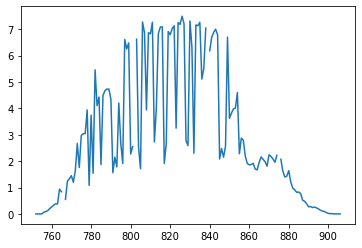

In [3]:
df3=pd.DataFrame()
df3 = df2[df2['Date'] == '2022/10/05']["Production（kW）"].plot()

In [4]:
#df2.to_csv("Lindalva e Severino.csv")

In [5]:
#Now that the first csv file was compacted from the first system lets genarete a function to create
# all five systems.

Paulino=pd.DataFrame()

given_date = '08/01/2022'
totalfiles = 69
file_name = "Paulino"

Sevem =pd.DataFrame()
given_date2 = '09/09/2022'
totalfiles2 = 30
file_name2 = "Sevem e Marcelo"

Tubarao=pd.DataFrame()
given_date3 = '09/22/2022'
totalfiles3 = 17
file_name3 = "Tubarao"

Vinicius=pd.DataFrame()
given_date4 = '08/01/2022'
totalfiles4 = 69
file_name4 = "Vinicius"



def csv_compact_file (totalfiles,given_date,file_name):
    n=1
    date_format = '%m/%d/%Y'
    df2=pd.DataFrame()
    dtObj = datetime.strptime(given_date, date_format)
    for n in range(totalfiles):
        future_date = dtObj + relativedelta(days=n)
        x=future_date.strftime("%m")
        y=future_date.strftime("%d")
        string = '../input/solarenergynortheastbrazil/Inversors data/'+ file_name + '/' + x +"-"+ y +'-22.xlsx'
        df=pd.read_excel(string)
        df=df[['Time','Production（kW）','Temperature（℃）','Weather']]
        df2=pd.concat([df2,df], ignore_index=True)
        df2['Date'] = df2['Time'].apply(lambda x: x.split(' ')[0])
        df2['Hour'] = df2['Time'].apply(lambda x: x.split(' ')[1])
        
    return(df2)

Paulino = csv_compact_file(totalfiles,given_date,file_name)
Sevem= csv_compact_file(totalfiles2,given_date2,file_name2)
Tubarao = csv_compact_file(totalfiles3,given_date3,file_name3)
Vinicius= csv_compact_file(totalfiles4,given_date4,file_name4)

In [6]:
Paulino.to_csv("Paulino.csv")
Sevem.to_csv("Sevem e Marcelo.csv")
Tubarao.to_csv("Tubarao.csv")
Vinicius.to_csv("Vinicius.csv")